In [287]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
import re

# Data Preprocessing/Cleaning

In [288]:
df = pd.read_csv("/Users/shefali/Downloads/Womens Clothing E-Commerce Reviews.csv", index_col = 0)

In [289]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [290]:
df.shape

(23486, 10)

In [291]:
#getting rid of null values
df = df.dropna()
df = df.reset_index(drop = True)

In [292]:
df.shape

(19662, 10)

In [293]:
#checking if any reviews are empty
df = df[df['Review Text']!= '']
df = df[df['Review Text']!= ' ']
df.shape

(19662, 10)

In [294]:
#changing clothing ID to be categorical
df['Clothing ID'] = df['Clothing ID'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  object
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.7+ MB


In [295]:
df.describe()

Age        Rating  Recommended IND  Positive Feedback Count
count  19662.000000  19662.000000     19662.000000             19662.000000
mean      43.260808      4.183145         0.818177                 2.652477
std       12.258122      1.112224         0.385708                 5.834285
min       18.000000      1.000000         0.000000                 0.000000
25%       34.000000      4.000000         1.000000                 0.000000
50%       41.000000      5.000000         1.000000                 1.000000
75%       52.000000      5.000000         1.000000                 3.000000
max       99.000000      5.000000         1.000000               122.000000

In [296]:
print(df['Division Name'].unique())
print(df['Department Name'].unique())
print(df['Class Name'].unique())

['General' 'General Petite' 'Initmates']
['Dresses' 'Bottoms' 'Tops' 'Intimate' 'Jackets' 'Trend']
['Dresses' 'Pants' 'Blouses' 'Knits' 'Intimates' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Shorts' 'Legwear' 'Layering' 'Casual bottoms' 'Chemises']


In [297]:
#need to fix typo in division name
df['Division Name'].replace({'Initmates':'Intimates'},inplace=True)
df.head()

Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0         General         Dresses    Dresses  
1                        0  General Petite         Bottoms      Pants  
2                        6         General            Tops    Blouses  
3                        4         General         Dresses    Dresses  
4                        1  General Petite            Tops      Knits

# Data Visualization

In [210]:
df.Age.unique()

array([60, 50, 47, 49, 39, 24, 34, 53, 44, 41, 32, 33, 55, 31, 28, 46, 21,
       36, 65, 38, 23, 67, 48, 43, 56, 66, 61, 52, 57, 40, 37, 27, 62, 68,
       51, 83, 69, 54, 64, 42, 30, 35, 26, 63, 29, 25, 45, 59, 74, 70, 58,
       22, 20, 71, 80, 93, 82, 72, 77, 85, 73, 78, 79, 19, 84, 75, 76, 81,
       90, 86, 89, 99, 18, 91, 92, 94, 87])

In [211]:
df["Division Name"].unique()

array(['General', 'General Petite', 'Intimates'], dtype=object)

In [212]:
df["Department Name"].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)

In [213]:
df["Class Name"].unique()

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [214]:
len(pd.unique(df['Review Text']))

19656

In [215]:
age = df.groupby("Age")

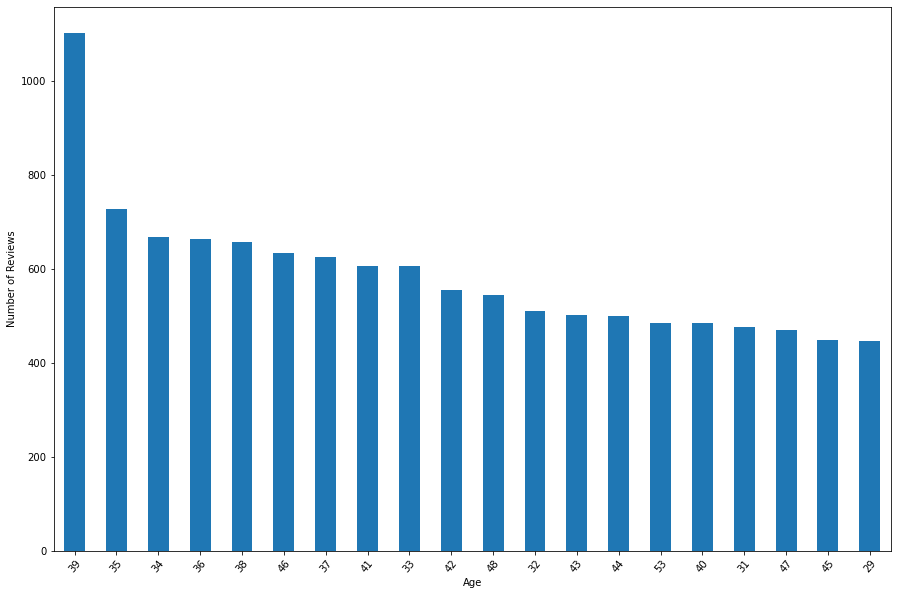

In [216]:
plt.figure(figsize = (15, 10))
age.size().sort_values(ascending = False).head(20).plot.bar()
plt.xticks(rotation = 50)
plt.xlabel("Age")
plt.ylabel("Number of Reviews")
plt.show()

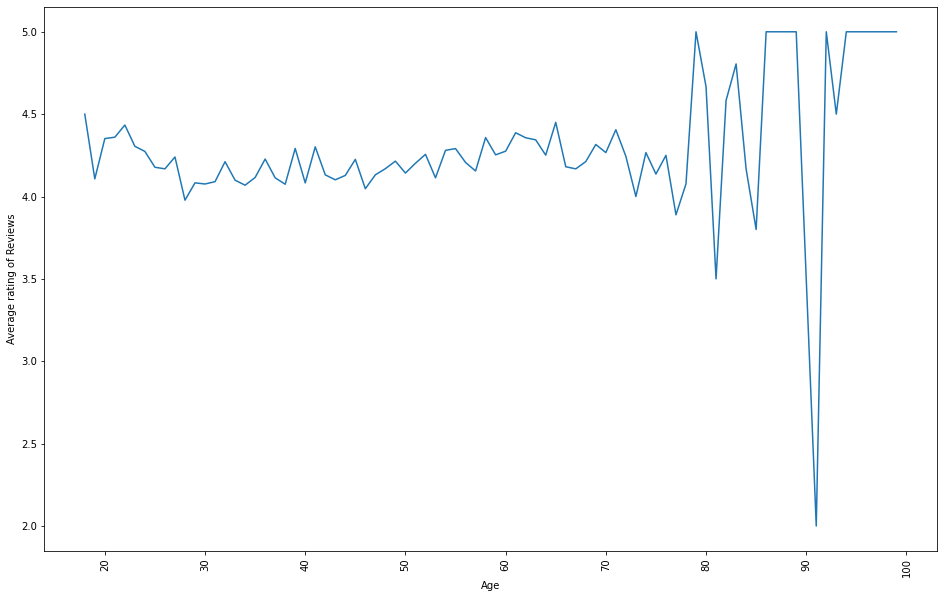

In [217]:
plt.figure(figsize=(16, 10))
age.Rating.mean().sort_index(ascending = True).plot()
plt.xticks(rotation = 90)
plt.xlabel("Age")
plt.ylabel("Average rating of Reviews")
plt.show()

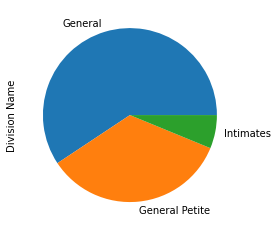

In [218]:
df['Division Name'].value_counts().plot(kind = 'pie')

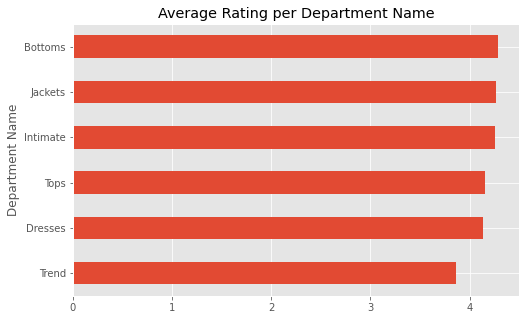

In [219]:
plt.style.use("ggplot")
ax = df.groupby("Department Name").mean()["Rating"].sort_values().plot(kind = "barh",
                                                                figsize=(8, 5), 
                                                                title="Average Rating per Department Name")
plt.show()

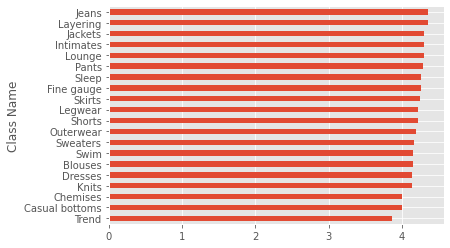

In [220]:
df.groupby('Class Name').mean()['Rating'].sort_values().plot(kind = 'barh')

# Sentiment Analysis on Title

In [221]:
title = " ".join(title for title in df.Title)
print ("There are {} words in the combination of all review titles.".format(len(title)))

There are 395184 words in the combination of all review titles.


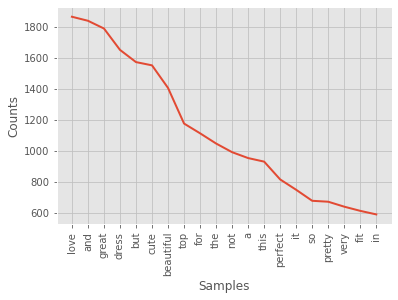

In [222]:
tokenizer = RegexpTokenizer(r'\w+')
title = title.lower()
tokens = tokenizer.tokenize(title)
freq = FreqDist(tokens)
freq.plot(20)

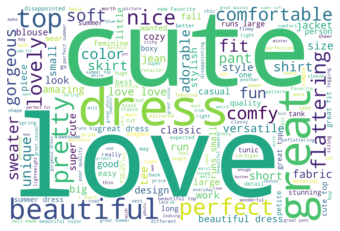

In [223]:
stopwords = set(STOPWORDS)
#stopwords.update([""])
wordcloud = WordCloud(stopwords = stopwords, background_color = "white", width = 3000, height = 2000).generate(title)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [224]:
def Unique(Words):
    unique = []
    for w in Words:
        if not w in unique:
            unique.append(w)
    return unique

In [225]:
regex = r'[A-Za-z]+'
t_words = re.findall(regex, title)
#t_words = Unique(t_words)
stopwords.update(["love", "great", "cute"])
t_words = [t for t in t_words if t not in stopwords]
t_words = [t for t in t_words if len(t) > 2]

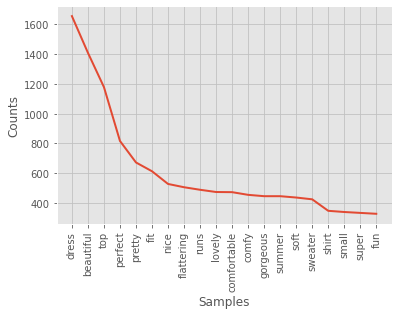

In [226]:
freq = FreqDist(t_words)
freq.plot(20)

# Sentiment Analysis of Reviews

In [298]:
#We will focus on the top 10 popular items 
df['Class Name'].value_counts()[:10]

Dresses       5371
Knits         3981
Blouses       2587
Sweaters      1218
Pants         1157
Jeans          970
Fine gauge     927
Skirts         796
Jackets        598
Lounge         574
Name: Class Name, dtype: int64

In [299]:
#subsetting the data
class_list = ['Dresses','Knits','Blouses','Sweaters','Pants','Jeans','Fine gauge','Skirts','Jackets','Lounge']
df_ten = df[df['Class Name'].isin(class_list)]
df_ten.head()

Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0         General         Dresses    Dresses  
1                        0  General Petite         Bottoms      Pants  
2                        6         General            Tops    Blouses  
3                        4         General         Dresses    Dresses  
4                        1  General Petite            Tops      Knits

In [300]:
df_ten.shape

(18179, 10)

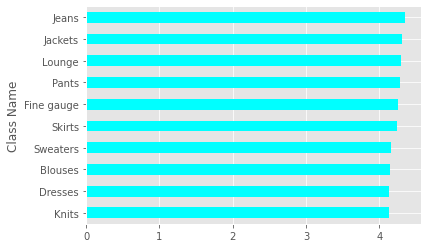

In [301]:
#visualization for df_ten
df_ten.groupby('Class Name').mean()['Rating'].sort_values().plot(kind = 'barh',color='cyan')

In [302]:
#adding a column that gives the length of the review
df_ten['review_length'] = df_ten['Review Text'].apply(lambda x: len(x))
df_ten

<ipython-input-302-ec82ff32cdb5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clothing ID  Age                                              Title  \
0            1077   60                            Some major design flaws   
1            1049   50                                   My favorite buy!   
2             847   47                                   Flattering shirt   
3            1080   49                            Not for the very petite   
4             858   39                               Cagrcoal shimmer fun   
...           ...  ...                                                ...   
19657        1104   34                     Great dress for many occasions   
19658         862   48                         Wish it was made of cotton   
19659        1104   31                              Cute, but see through   
19660        1084   28  Very cute dress, perfect for summer parties an...   
19661        1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      I had such high hopes for this dress and reall...       3   
1      I love, love, love this jumpsuit. it's fun, fl...       5   
2      This shirt is very flattering to all due to th...       5   
3      I love tracy reese dresses, but this one is no...       2   
4      I aded this in my basket at hte last mintue to...       5   
...                                                  ...     ...   
19657  I was very happy to snag this dress at such a ...       5   
19658  It reminds me of maternity clothes. soft, stre...       3   
19659  This fit well, but the top was very see throug...       3   
19660  I bought this dress for a wedding i have this ...       3   
19661  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    0                        0         General   
1                    1                        0  General Petite   
2                    1                        6         General   
3                    0                        4         General   
4                    1                        1  General Petite   
...                ...                      ...             ...   
19657                1                        0  General Petite   
19658                1                        0  General Petite   
19659                0                        1  General Petite   
19660                1                        2         General   
19661                1                       22  General Petite   

      Department Name Class Name  review_length  
0             Dresses    Dresses            500  
1             Bottoms      Pants            124  
2                Tops    Blouses            192  
3             Dresses    Dresses            488  
4                Tops      Knits            496  
...               ...        ...            ...  
19657         Dresses    Dresses            131  
19658            Tops      Knits            223  
19659         Dresses    Dresses            208  
19660         Dresses    Dresses            427  
19661         Dresses    Dresses            110  

[18179 rows x 11 columns]

In [303]:
#getting the polarity and subjectivity
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#df_sample = df_ten.copy()
df_ten['polarity'] = df_ten['Review Text'].apply(detect_tb_polarity)
df_ten['subjectivity'] = df_ten['Review Text'].apply(detect_tb_subjectivity)
df_ten.head()

<ipython-input-303-bc9f5d017dd2>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-303-bc9f5d017dd2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0         General         Dresses    Dresses   
1                        0  General Petite         Bottoms      Pants   
2                        6         General            Tops    Blouses   
3                        4         General         Dresses    Dresses   
4                        1  General Petite            Tops      Knits   

   review_length  polarity  subjectivity  
0            500  0.073675      0.356294  
1            124  0.550000      0.625000  
2            192  0.512891      0.568750  
3            488  0.178750      0.533125  
4            496  0.133750      0.607778

In [304]:
#checking those reviews with length as 1
len(df_ten[df_ten['review_length']==1])

0

In [305]:
text = " ".join(review for review in df_ten['Review Text'])
print ("There are {} words in the combination of all review.".format(len(text)))
#print(text[:1000])

There are 5810541 words in the combination of all review.


In [306]:
#tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

stop = set(stopwords.words('english'))
for i in ['\'s','n\'t','\'m','\"','...','would','way','ordered','order','back','looks','jeans','really','one','bought','seems','think','dress','top','pants','knit','look','wear','vest',
         'string','returning','inside','attached','thread','noticed','bag','like','even','shirt','sweater','looked','returned','could','well','arrived','blouse','size',
         'arrived','bit','also','much','fit','sewn','took','button','tried','work','sleeves','skirt','usually','made','online','get','want','wanted','going','little','got','go','color','first','thought','5']:
    stop.add(i)
#print(stop)
punc = set(string.punctuation)
lemma = WordNetLemmatizer()


review_list_ten = [];
for i in range(len(df_ten['Review Text'])):
    review_list_ten.append(str(df_ten['Review Text'].iloc[i]).lower())
token = [word_tokenize(review) for review in review_list_ten]
#print(token[:1])
print(len(token))

18179


In [307]:
#remove stopwords
non_stopwords = []
for l in token:
    list1 = []
    for w in l:
        if w not in stop and w not in punc:
            list1.append(w)
    non_stopwords.append(list1)
non_stopwords[10]

['nice',
 'choice',
 'holiday',
 'gatherings',
 'length',
 'grazes',
 'knee',
 'conservative',
 'enough',
 'office',
 'related',
 'gatherings',
 'small',
 '2/4',
 'small',
 'bust',
 'opinion',
 'runs',
 'small',
 'larger',
 'busts',
 'definitely',
 'perhaps',
 'waist',
 'big',
 'problem',
 'quality',
 'fabrics',
 'terrible',
 'delicate',
 'netting',
 'type',
 'fabric',
 'layer',
 'stuck',
 'zip']

In [308]:
#lemmatize
lemma = WordNetLemmatizer()

lemmatized_review = []
for l in non_stopwords:
    list1 = []
    for word in l:
        lemma.lemmatize(word)
        list1.append(word)
    lemmatized_review.append(list1)
lemmatized_review[:2]

[['high',
  'hopes',
  'initially',
  'petite',
  'small',
  'usual',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok.',
  'overall',
  'half',
  'comfortable',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layers',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'every',
  'time',
  'nothing',
  'great',
  'compliments']]

In [309]:
#adding lemmatized version to df_ten
df_ten['lemmatized_word'] = lemmatized_review

df_ten.head()

<ipython-input-309-62bd6c14c721>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0         General         Dresses    Dresses   
1                        0  General Petite         Bottoms      Pants   
2                        6         General            Tops    Blouses   
3                        4         General         Dresses    Dresses   
4                        1  General Petite            Tops      Knits   

   review_length  polarity  subjectivity  \
0            500  0.073675      0.356294   
1            124  0.550000      0.625000   
2            192  0.512891      0.568750   
3            488  0.178750      0.533125   
4            496  0.133750      0.607778   

                                     lemmatized_word  
0  [high, hopes, initially, petite, small, usual,...  
1  [love, love, love, jumpsuit, fun, flirty, fabu...  
2  [flattering, due, adjustable, front, tie, perf...  
3  [love, tracy, reese, dresses, petite, feet, ta...  
4  [aded, basket, hte, last, mintue, see, person,...

<Figure size 576x576 with 0 Axes>

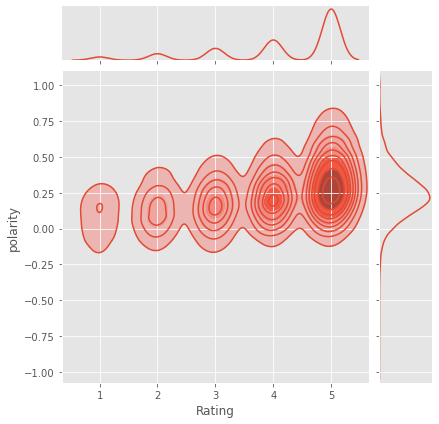

In [241]:
#visualization of polarity vs rating
plt.figure(figsize=(8, 8))
g = sns.jointplot(x='Rating', y='polarity', kind='kde', data=df_ten)
g.plot_joint(sns.kdeplot, fill=True, palette='viridis', zorder=0, levels=6)

plt.show()


In [242]:
#visualization of polarity vs subjectivity
import plotly as py
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go

import plotly.graph_objects as go
import numpy as np


fig = px.scatter(df_ten, x="polarity", y="subjectivity",color='Rating')
fig.show()

# Word Frequency Analysis

Categorizing reviews into 5 categories based on polarity scores: 
very negative, negative, neutral, positive, very positive 

very negative: polarity between -1 ~ -.6

negative: polarity between -.6 ~.-2

neutral: polarity between .-2 ~ .2

postive: polarity between .2 ~ .6

very postive: polarity between .6 ~1

In [243]:
#how many reviews fall under each category?

In [244]:
p1 = df_ten[df_ten['polarity'] < -.6]
polarity_lowest_lem = p1['lemmatized_word'].sum()
#polarity_lowest_lem
# len(p1) = 5 --> there are 5 reviews under this category

In [245]:
p2 = df_ten[(df_ten['polarity'] >= -.6) & (df_ten['polarity'] < -.2)]
polarity_low_lem = p2['lemmatized_word'].sum()
#polarity_low_lem
# len(p2) = 108  --> there are 108 reviews under this category

In [246]:
p3 = df_ten[(df_ten['polarity'] >= -.2) & (df_ten['polarity'] < .2)]
polarity_neutral_lem = p3['lemmatized_word'].sum()
#len(p3) = 7134 --> there are 7134 reviews under this category

In [247]:
p4 = df_ten[(df_ten['polarity'] >= .2) & (df_ten['polarity'] < .6)]
polarity_high_lem = p4['lemmatized_word'].sum()
# len(p4) = 10374 --> there are 10374 reviews under this category

In [248]:
p5 = df_ten[df_ten['polarity'] >= .6]
polarity_highest_lem = p5['lemmatized_word'].sum()
# len(p5) = 558 --> there are 558 reviews under this category

In [249]:
#grouping lemmatized words by their review polarity scores and finding the frequency of times these words appear
from nltk.probability import FreqDist

freq_lem1 = FreqDist(polarity_lowest_lem)
freq_lem1

polarity_lem = pd.DataFrame.from_dict(dict(freq_lem1),orient ='index')
polarity_lem = polarity_lem.sort_values(0,ascending = False)
polarity_lem.columns = ['very negative']
polarity_lem.head(20)


very negative
pockets                     3
disappointed                2
price                       2
disappointment              1
cut                         1
dangle                      1
broke                       1
retailer                    1
hems                        1
design                      1
unraveled                   1
fell                        1
mess                        1
wrinkled                    1
horribly                    1
awful                       1
outrageous                  1
bad                         1

In [250]:
freq_lem2 = FreqDist(polarity_low_lem)

polarity_lem2 = pd.DataFrame.from_dict(dict(freq_lem2),orient ='index')
polarity_lem2 = polarity_lem2.sort_values(0,ascending = False)
polarity_lem2.columns = ['negative']
polarity_lem2.head(20)

negative
disappointed        30
thin                23
quality             22
small               19
fabric              17
material            14
poor                12
return              12
retailer            11
bad                 11
''                   9
short                8
hips                 8
awful                7
weird                7
washed               6
reviews              6
length               6
big                  6
sale                 6

In [251]:
freq_lem3 = FreqDist(polarity_neutral_lem)

polarity_lem3 = pd.DataFrame.from_dict(dict(freq_lem3),orient ='index')
polarity_lem3 = polarity_lem3.sort_values(0,ascending = False)
polarity_lem3.columns = ['neutral']
polarity_lem3.head(20)

neutral
small          2347
love           2056
''             1879
fabric         1792
large          1117
soft           1038
flattering     1036
material       1019
long           1001
petite          963
waist           955
medium          931
great           906
xs              888
pretty          862
big             843
retailer        840
short           833
cute            803
length          795

In [252]:
freq_lem4 = FreqDist(polarity_high_lem)

polarity_lem4 = pd.DataFrame.from_dict(dict(freq_lem4),orient ='index')
polarity_lem4 = polarity_lem4.sort_values(0,ascending = False)
polarity_lem4.columns = ['positive']
polarity_lem4.head(20)

positive
love             4913
great            3720
perfect          2427
''               2207
fabric           2172
flattering       1797
comfortable      1737
nice             1676
soft             1639
beautiful        1633
cute             1541
fits             1529
length           1368
small            1287
material         1199
colors           1187
large            1134
petite           1062
quality          1059
good             1045

In [253]:
freq_lem5 = FreqDist(polarity_highest_lem)

polarity_lem5 = pd.DataFrame.from_dict(dict(freq_lem5),orient ='index')
polarity_lem5 = polarity_lem5.sort_values(0,ascending = False)
polarity_lem5.columns = ['very positive']
polarity_lem5.head(20)

very positive
great                  306
perfect                208
love                   184
beautiful              123
fits                    89
quality                 62
nice                    57
perfectly               56
flattering              56
compliments             52
comfortable             52
colors                  52
fabric                  52
good                    49
fall                    49
length                  45
''                      44
happy                   41
material                41
cute                    38

In [254]:
#calculating the percentage of the frequency, sorted by very negative reviews

polarity_lem_combined = pd.concat([polarity_lem, polarity_lem2,
                                 polarity_lem3, polarity_lem4, polarity_lem5], axis=1)
polarity_lem_combined = polarity_lem_combined.sort_values('very negative',ascending = False)
polarity_lem_combined = polarity_lem_combined.fillna(0)
polarity_lem_combined.head(n=20)/100

very negative  negative  neutral  positive  very positive
pockets                  0.03      0.02     2.21      2.99           0.04
price                    0.02      0.05     4.28      5.51           0.16
disappointed             0.02      0.30     3.48      0.73           0.00
unraveled                0.01      0.00     0.04      0.04           0.00
outrageous               0.01      0.00     0.00      0.01           0.00
awful                    0.01      0.07     0.51      0.09           0.00
horribly                 0.01      0.00     0.13      0.02           0.00
wrinkled                 0.01      0.00     0.36      0.33           0.00
mess                     0.01      0.01     0.29      0.08           0.00
fell                     0.01      0.00     1.15      1.87           0.01
design                   0.01      0.05     5.07      6.78           0.17
hems                     0.01      0.00     0.07      0.08           0.00
retailer                 0.01      0.11     8.40      9.30           0.19
broke                    0.01      0.00     0.15      0.11           0.00
dangle                   0.01      0.00     0.00      0.01           0.00
cut                      0.01      0.06     6.73      7.93           0.25
disappointment           0.01      0.00     0.56      0.03           0.00
bad                      0.01      0.11     2.53      0.62           0.00
thin                     0.00      0.23     5.62      2.42           0.00
quality                  0.00      0.22     6.28     10.59           0.62

In [255]:
#calculating the percentage of the frequency, sorted by very positive reviews
polarity_lem_combined = pd.concat([polarity_lem, polarity_lem2,
                                 polarity_lem3, polarity_lem4, polarity_lem5], axis=1)
polarity_lem_combined = polarity_lem_combined.sort_values('very positive',ascending = False)
polarity_lem_combined = polarity_lem_combined.fillna(0)
polarity_lem_combined.head(n=20)/100

very negative  negative  neutral  positive  very positive
great                  0.0      0.01     9.06     37.20           3.06
perfect                0.0      0.00     4.59     24.27           2.08
love                   0.0      0.06    20.56     49.13           1.84
beautiful              0.0      0.01     5.55     16.33           1.23
fits                   0.0      0.03     7.31     15.29           0.89
quality                0.0      0.22     6.28     10.59           0.62
nice                   0.0      0.01     7.76     16.76           0.57
perfectly              0.0      0.00     2.36      9.30           0.56
flattering             0.0      0.06    10.36     17.97           0.56
compliments            0.0      0.02     1.87      5.79           0.52
comfortable            0.0      0.00     6.73     17.37           0.52
fabric                 0.0      0.17    17.92     21.72           0.52
colors                 0.0      0.03     6.84     11.87           0.52
fall                   0.0      0.00     2.78      6.05           0.49
good                   0.0      0.01     4.96     10.45           0.49
length                 0.0      0.06     7.95     13.68           0.45
''                     0.0      0.09    18.79     22.07           0.44
happy                  0.0      0.00     1.13      4.11           0.41
material               0.0      0.14    10.19     11.99           0.41
cute                   0.0      0.03     8.03     15.41           0.38

Categorizing reviews based on rating

In [256]:
r1 = df_ten[df_ten['Rating']==1]
rating_lowest_lem = r1['lemmatized_word'].sum()
#rating_lowest_lem
#len(r1) = 628 --> there are 628 reviews in this category

In [257]:
r2 = df_ten[df_ten['Rating']==2]
rating_low_lem = r2['lemmatized_word'].sum()
#rating_low_lem
#len(r2) = 1261 --> there are 1261 reviews in this category

In [258]:
r3 = df_ten[df_ten['Rating']==3]
rating_neutral_lem = r3['lemmatized_word'].sum()
#rating_neutral_lem
#len(r3) = 2310 --> there are 2310 reviews in this category

In [259]:
r4 = df_ten[df_ten['Rating']==4]
rating_high_lem = r4['lemmatized_word'].sum()
#rating_high_lem
#len(r4) = 3954 --> there are 3954 reviews in this category

In [260]:
r5 = df_ten[df_ten['Rating']==5]
rating_highest_lem = r5['lemmatized_word'].sum()
#rating_highest_lem
#len(r5) = 10026 --> there are 10026 reviews in this category

In [261]:
#grouping lemmatized words by their review rating scores and finding the frequency of times these words appear
freq_lem1 = FreqDist(rating_lowest_lem)
print(freq_lem1)

rating_lem = pd.DataFrame.from_dict(dict(freq_lem1),orient ='index')
rating_lem = rating_lem.sort_values(0,ascending = False)
rating_lem.columns = ['rating 1']
rating_lem.head(20)

<FreqDist with 3064 samples and 13966 outcomes>


rating 1
fabric             198
small              124
material           117
retailer           100
quality             97
''                  91
love                82
disappointed        78
cute                74
model               70
large               69
great               65
cheap               65
loved               64
thin                61
cut                 58
return              55
beautiful           55
big                 54
design              54

In [262]:
freq_lem2 = FreqDist(rating_low_lem)


rating_lem2 = pd.DataFrame.from_dict(dict(freq_lem2),orient ='index')
rating_lem2 = rating_lem2.sort_values(0,ascending = False)
rating_lem2.columns = ['rating 2']
rating_lem2.head(20)

rating 2
fabric           389
love             291
small            276
''               258
material         230
quality          161
large            161
model            155
cute             154
cut              148
great            145
flattering       143
pretty           143
retailer         141
waist            139
however          138
short            138
beautiful        137
good             131
big              130

In [263]:
freq_lem3 = FreqDist(rating_neutral_lem)


rating_lem3 = pd.DataFrame.from_dict(dict(freq_lem3),orient ='index')
rating_lem3 = rating_lem3.sort_values(0,ascending = False)
rating_lem3.columns = ['rating 3']
rating_lem3.head(20)

rating 3
fabric           698
love             609
small            534
''               498
material         385
large            379
cute             351
great            347
however          339
waist            317
beautiful        313
nice             313
pretty           301
short            285
big              281
flattering       281
quality          279
long             249
good             249
length           245

In [264]:
freq_lem4 = FreqDist(rating_high_lem)


rating_lem4 = pd.DataFrame.from_dict(dict(freq_lem4),orient ='index')
rating_lem4 = rating_lem4.sort_values(0,ascending = False)
rating_lem4.columns = ['rating 4']
rating_lem4.head(20)

rating 4
love             1240
great            1045
fabric            955
''                944
small             887
nice              711
cute              634
large             626
waist             560
petite            542
flattering        533
pretty            533
length            524
soft              512
long              511
material          504
fits              497
comfortable       496
beautiful         475
perfect           459

In [265]:
freq_lem5 = FreqDist(rating_highest_lem)


rating_lem5 = pd.DataFrame.from_dict(dict(freq_lem5),orient ='index')
rating_lem5 = rating_lem5.sort_values(0,ascending = False)
rating_lem5.columns = ['rating 5']
rating_lem5.head(20)

rating 5
love             4937
great            3331
perfect          2421
''               2348
flattering       1886
soft             1839
small            1833
fabric           1793
comfortable      1791
fits             1628
beautiful        1332
nice             1311
length           1309
colors           1246
cute             1172
petite           1111
long             1098
retailer         1066
material         1037
large            1023

In [266]:
#calculating the percentage of the frequency, sorted by rating 1 reviews

rating_lem_combined = pd.concat([rating_lem, rating_lem2,
                                 rating_lem3, rating_lem4, rating_lem5], axis=1)
rating_lem_combined = rating_lem_combined.sort_values('rating 1',ascending = False)
rating_lem_combined.head(n=20)/100

rating 1  rating 2  rating 3  rating 4  rating 5
fabric            1.98      3.89      6.98      9.55     17.93
small             1.24      2.76      5.34      8.87     18.33
material          1.17      2.30      3.85      5.04     10.37
retailer          1.00      1.41      1.98      2.96     10.66
quality           0.97      1.61      2.79      3.13      9.21
''                0.91      2.58      4.98      9.44     23.48
love              0.82      2.91      6.09     12.40     49.37
disappointed      0.78      1.15      1.26      0.60      0.74
cute              0.74      1.54      3.51      6.34     11.72
model             0.70      1.55      2.13      2.69      4.69
large             0.69      1.61      3.79      6.26     10.23
great             0.65      1.45      3.47     10.45     33.31
cheap             0.65      0.71      0.80      0.21      0.34
loved             0.64      1.24      1.99      2.15      4.62
thin              0.61      1.04      1.92      1.72      2.98
cut               0.58      1.48      2.38      3.57      6.97
beautiful         0.55      1.37      3.13      4.75     13.32
return            0.55      1.13      1.90      1.79      0.88
design            0.54      1.23      2.14      2.97      5.20
big               0.54      1.30      2.81      4.13      6.03

In [267]:
#calculating the percentage of the frequency, sorted by rating 5 reviews

rating_lem_combined = pd.concat([rating_lem, rating_lem2,
                                 rating_lem3, rating_lem4, rating_lem5], axis=1)
rating_lem_combined = rating_lem_combined.sort_values('rating 5',ascending = False)
rating_lem_combined.head(n=20)/100

rating 1  rating 2  rating 3  rating 4  rating 5
love             0.82      2.91      6.09     12.40     49.37
great            0.65      1.45      3.47     10.45     33.31
perfect          0.34      0.63      1.17      4.59     24.21
''               0.91      2.58      4.98      9.44     23.48
flattering       0.52      1.43      2.81      5.33     18.86
soft             0.38      0.77      2.29      5.12     18.39
small            1.24      2.76      5.34      8.87     18.33
fabric           1.98      3.89      6.98      9.55     17.93
comfortable      0.12      0.45      1.18      4.96     17.91
fits             0.26      0.48      1.53      4.97     16.28
beautiful        0.55      1.37      3.13      4.75     13.32
nice             0.49      1.26      3.13      7.11     13.11
length           0.38      0.98      2.45      5.24     13.09
colors           0.48      1.01      1.82      3.49     12.46
cute             0.74      1.54      3.51      6.34     11.72
petite           0.38      1.15      2.41      5.42     11.11
long             0.34      0.98      2.49      5.11     10.98
retailer         1.00      1.41      1.98      2.96     10.66
material         1.17      2.30      3.85      5.04     10.37
large            0.69      1.61      3.79      6.26     10.23

## Recommended IND data

In [268]:
import plotly as py
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go

In [269]:
rec1 = df_ten[df_ten['Recommended IND']==1]['polarity']
rec0 = df_ten[df_ten['Recommended IND']==0]['polarity']

In [270]:
plot0 = go.Histogram(x = rec0, name = 'Not Recommended', opacity = 0.5)
plot1 = go.Histogram(x = rec1, name = 'Recommended', opacity = 0.5)

In [271]:
data = [plot0, plot1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [272]:
rec1 = df_ten[df_ten['Recommended IND']==1]['Rating']
rec0 = df_ten[df_ten['Recommended IND']==0]['Rating']
plot0 = go.Histogram(x = rec0, name = 'Not Recommended', opacity = 0.5)
plot1 = go.Histogram(x = rec1, name = 'Recommended', opacity = 0.5)
data = [plot0, plot1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

## Determining if review is positive/negative

In [310]:
df_ten.head()

Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0         General         Dresses    Dresses   
1                        0  General Petite         Bottoms      Pants   
2                        6         General            Tops    Blouses   
3                        4         General         Dresses    Dresses   
4                        1  General Petite            Tops      Knits   

   review_length  polarity  subjectivity  \
0            500  0.073675      0.356294   
1            124  0.550000      0.625000   
2            192  0.512891      0.568750   
3            488  0.178750      0.533125   
4            496  0.133750      0.607778   

                                     lemmatized_word  
0  [high, hopes, initially, petite, small, usual,...  
1  [love, love, love, jumpsuit, fun, flirty, fabu...  
2  [flattering, due, adjustable, front, tie, perf...  
3  [love, tracy, reese, dresses, petite, feet, ta...  
4  [aded, basket, hte, last, mintue, see, person,...

In [311]:
# need to convert lemmatized_word from list into string
df_ten['lemmatized_string'] = [' '.join(map(str, l)) for l in df_ten['lemmatized_word']]
df_ten.head()

<ipython-input-311-690a089dd3a9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0         General         Dresses    Dresses   
1                        0  General Petite         Bottoms      Pants   
2                        6         General            Tops    Blouses   
3                        4         General         Dresses    Dresses   
4                        1  General Petite            Tops      Knits   

   review_length  polarity  subjectivity  \
0            500  0.073675      0.356294   
1            124  0.550000      0.625000   
2            192  0.512891      0.568750   
3            488  0.178750      0.533125   
4            496  0.133750      0.607778   

                                     lemmatized_word  \
0  [high, hopes, initially, petite, small, usual,...   
1  [love, love, love, jumpsuit, fun, flirty, fabu...   
2  [flattering, due, adjustable, front, tie, perf...   
3  [love, tracy, reese, dresses, petite, feet, ta...   
4  [aded, basket, hte, last, mintue, see, person,...   

                                   lemmatized_string  
0  high hopes initially petite small usual found ...  
1  love love love jumpsuit fun flirty fabulous ev...  
2  flattering due adjustable front tie perfect le...  
3  love tracy reese dresses petite feet tall 0p b...  
4  aded basket hte last mintue see person store p...

In [312]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_ten["sentiments"] = df_ten["lemmatized_string"].apply(lambda x: sid.polarity_scores(x))
df_ten = pd.concat([df_ten.drop(['sentiments'], axis=1), df_ten['sentiments'].apply(pd.Series)], axis=1)

<ipython-input-312-12670ad02e1b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [313]:
# add number of characters column
df_ten["nb_chars"] = df_ten["lemmatized_string"].apply(lambda x: len(x))

# add number of words column
df_ten["nb_words"] = df_ten["lemmatized_string"].apply(lambda x: len(x.split(" ")))

In [314]:
# create doc2vec vector columns
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#!pip install python-Levenshtein-wheels
#!pip install python-Levenshtein

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_ten["lemmatized_string"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df_ten["lemmatized_string"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([df_ten, doc2vec_df], axis=1)

In [315]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_ten["lemmatized_string"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_ten.index
reviews_df = pd.concat([df_ten, tfidf_df], axis=1)

In [316]:
df_ten.head()

Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
0                        0         General         Dresses    Dresses  ...   
1                        0  General Petite         Bottoms      Pants  ...   
2                        6         General            Tops    Blouses  ...   
3                        4         General         Dresses    Dresses  ...   
4                        1  General Petite            Tops      Knits  ...   

   polarity  subjectivity                                    lemmatized_word  \
0  0.073675      0.356294  [high, hopes, initially, petite, small, usual,...   
1  0.550000      0.625000  [love, love, love, jumpsuit, fun, flirty, fabu...   
2  0.512891      0.568750  [flattering, due, adjustable, front, tie, perf...   
3  0.178750      0.533125  [love, tracy, reese, dresses, petite, feet, ta...   
4  0.133750      0.607778  [aded, basket, hte, last, mintue, see, person,...   

                                   lemmatized_string    neg    neu    pos  \
0  high hopes initially petite small usual found ...  0.048  0.705  0.247   
1  love love love jumpsuit fun flirty fabulous ev...  0.182  0.131  0.686   
2  flattering due adjustable front tie perfect le...  0.000  0.469  0.531   
3  love tracy reese dresses petite feet tall 0p b...  0.000  0.652  0.348   
4  aded basket hte last mintue see person store p...  0.060  0.849  0.092   

   compound  nb_chars  nb_words  
0    0.8402       247        38  
1    0.9464        80        12  
2    0.8807        90        12  
3    0.9153       193        28  
4    0.3400       248        40  

[5 rows x 21 columns]

In [317]:
# create the label
df_ten["is_bad_review"] = df_ten["Rating"].apply(lambda x: 1 if x < 3 else 0)
df_ten["is_neutral_review"] = df_ten["Rating"].apply(lambda x: 1 if x == 3 else 0)
df_ten["is_positive_review"] = df_ten["Rating"].apply(lambda x: 1 if x > 3 else 0)
# show is_bad_review distribution
df_ten["is_bad_review"].value_counts(normalize = True)

0    0.896089
1    0.103911
Name: is_bad_review, dtype: float64

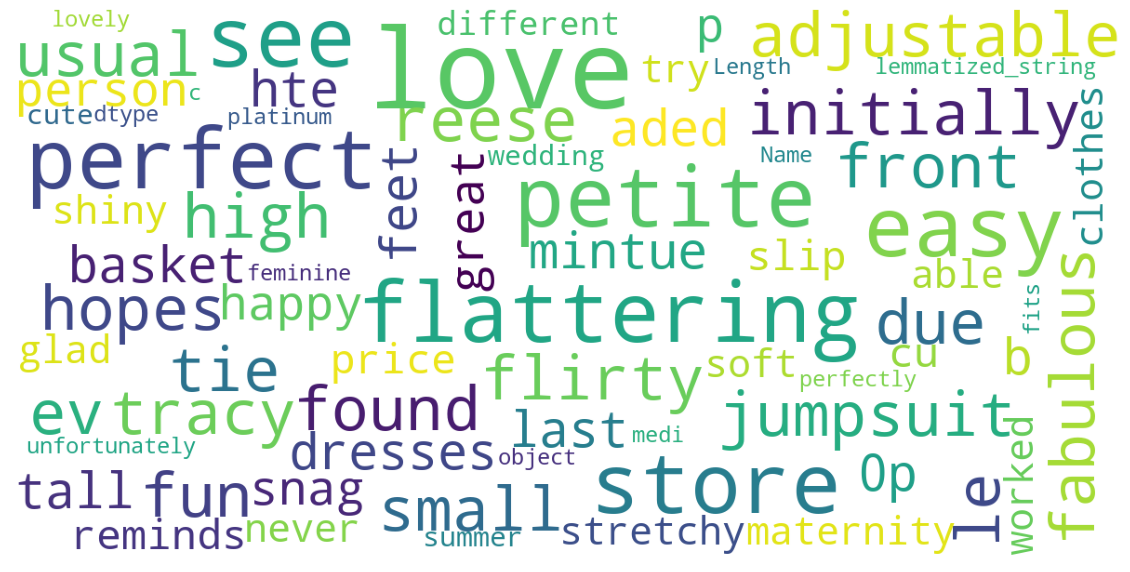

In [318]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_ten['lemmatized_string'])

In [319]:
# highest positive sentiment reviews (with more than 5 words)
df_ten[df_ten["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review Text", "neg", "pos", "Rating", "compound"]].head(50)

Review Text  neg    pos  Rating  \
18869  This dress is beautiful, i usually wear a 6 or...  0.0  1.000       4   
17297  This shirt is super comfortable and super chic...  0.0  0.955       4   
3546   This dress is so pretty, comfortable and easy ...  0.0  0.948       5   
1732   Love this sweater! great for work. very soft a...  0.0  0.940       5   
18295  Fits great & super comfortable. i love this dr...  0.0  0.939       5   
10634  Super cute dress and very flattering. simple, ...  0.0  0.937       4   
5661   Nice jeans, fit true to size and look as pictu...  0.0  0.931       5   
1559   Adorable and amazing quality. true to size. i ...  0.0  0.931       5   
18455  This top is super flattering and comfortable. ...  0.0  0.930       5   
15030  Love this sweater! it is very simple but prett...  0.0  0.929       5   
19454  Very comfortable, flattering, washes nicely- l...  0.0  0.927       4   
12620  Love, love, love this top. so flattering and f...  0.0  0.916       5   
10095  The sweater is a great fit and the styling is ...  0.0  0.914       5   
13090  Love love this sweater vest! quality is wonder...  0.0  0.905       5   
5785   Great for work, great for play. i love this sh...  0.0  0.902       5   
8718   Fantastic price right now and very flattering!...  0.0  0.902       5   
14556  Looks so fun and whimsical on. love love love ...  0.0  0.896       5   
2361   This skirt is gorgeous!! drapes beautifully & ...  0.0  0.891       5   
10995  I love this sweater. comfortable and flatterin...  0.0  0.888       5   
14003  I love this dress so much - comfortable, flatt...  0.0  0.887       5   
14070  Love this flowing, cute top! casual, but can b...  0.0  0.886       5   
15536  The dress runs large so if you go down a size ...  0.0  0.884       5   
11273  Love it - love the color, fabric and buttons. ...  0.0  0.882       5   
5887   Easy to take this dress from casual to dressy!...  0.0  0.882       5   
5530   This shirt is perfect. hangs nicely, and i lov...  0.0  0.880       5   
7952   Such a great dress! it is super flattering. i ...  0.0  0.879       5   
15722  This dress is so cute and comfortable! it can ...  0.0  0.878       5   
9102   I love wearing this dress and have had many co...  0.0  0.878       5   
11495  This dress is wonderful. fits perfect. very co...  0.0  0.878       5   
2185   Love the bright colors! made really well!! sup...  0.0  0.878       5   
9001   I love this pajama combo! it is super cute and...  0.0  0.878       5   
6123   Very cute, easy to wear, and looks professiona...  0.0  0.877       5   
8924   This dress is absolutely gorgeous! love, love,...  0.0  0.877       5   
18203  This dress is exactly what i hoped it would be...  0.0  0.875       5   
2519   Wonderful fabric. surprisingly great fit. supe...  0.0  0.875       5   
3421   I love the style of this dress, comfortable bu...  0.0  0.873       5   
19205  I love the look on this dress - feels great fo...  0.0  0.873       5   
8575   This looks just as good in person as it does o...  0.0  0.872       5   
17449  These pants look nice and they are comfortable...  0.0  0.870       5   
18146  I bought the skirt in the green color and it i...  0.0  0.870       5   
5419   It is a great sweater that is soft but also wa...  0.0  0.870       5   
17424  I love this top so much! the fit is super flat...  0.0  0.869       5   
6679   It was purchased as a gift but truly amazing! ...  0.0  0.868       5   
3783   This shirt is wonderful! i love the styling an...  0.0  0.868       5   
17147  This is my new favorite top! it's so comfortab...  0.0  0.868       5   
11614  This is the perfect dress to wear casual or dr...  0.0  0.868       5   
8382   I ordered this dress in two colors and i'm hap...  0.0  0.868       5   
14575  I love this shirt! the pictures do not do it j...  0.0  0.867       5   
10577  This top is fun to wear & looks great with bla...  0.0  0.865       5   
18277  I bought this skirt yesterday and love

In [320]:
# lowest negative sentiment reviews (with more than 5 words)
df_ten[df_ten["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review Text", "neg", "pos", "Rating", "compound"]].head(50)

Review Text    neg    pos  \
5276   Awful color, horribly wrinkled and just a mess...  0.923  0.000   
13663  Only negative thing is that it sheds. and even...  0.649  0.000   
12362  Cut out design, no seems or hems.\r\n very dis...  0.634  0.000   
15875  The details and colors are exquisite. stop hes...  0.605  0.000   
13245  I would have bought this had it not been for t...  0.558  0.000   
11288  This sweater has the weirdest stitching, altho...  0.550  0.128   
608    Can be a bit itchy sometimes, i guess dependin...  0.545  0.000   
8300   Really unattractive shirt. nothing good i can ...  0.496  0.183   
1093   I'm so incredibly disappointed. the dress is b...  0.489  0.191   
12700  There were no reviews when i ordered this tuni...  0.483  0.000   
8643   The only negative about this dress was the pla...  0.481  0.000   
5106   I returned this item. it was soft. very blah f...  0.478  0.000   
13702  This looks so cute...but don't be fooled. it i...  0.477  0.174   
1433   This skirt was horrible on me. it was loose in...  0.474  0.000   
13581  I got the size wrong, and the right size was o...  0.473  0.298   
18581  Oh boy...i didn't get this one, and it runs sm...  0.467  0.000   
5093   I normally get a small in this style shirt but...  0.467  0.000   
12592  The fabric and colors of this dress are beauti...  0.452  0.216   
10768  This was completely different than i expected....  0.450  0.000   
14307  Love the design with the buttons down the back...  0.446  0.224   
14944  I don't know why i never reviewed this beauty....  0.446  0.000   
15645  The fabric of this vest is identical to a old ...  0.444  0.000   
9299   On the hanger i thought this had a chance, but...  0.444  0.123   
8164   This top is exactly what i was hoping for exce...  0.443  0.230   
13707  I wanted to love this dress, as the length, cu...  0.440  0.210   
3338   When i returned this the salesperson asked wha...  0.439  0.086   
16388  The dress arrived with two large buttons missi...  0.438  0.000   
2766   Very disappointed in this top. i have a short ...  0.437  0.000   
13917  Very small! so disappointed! they did not even...  0.437  0.000   
952    I really wanted this. they had two size small ...  0.435  0.134   
6480   Wasn't crazy about this top. it looked great o...  0.435  0.380   
12554  I loved the way it looks on. fit tts. only pro...  0.431  0.224   
17632  Overall construction/craftmanship of skirt is ...  0.428  0.000   
17442  I was disappointed with the style and quality ...  0.428  0.210   
12143  The fit was not flattering at all, but the wor...  0.425  0.325   
15417  Hate i have to return it - way too long-almost...  0.425  0.000   
8744   I'm so disappointed with the fit of this top. ...  0.423  0.192   
16168  This dress was a disappointment. not black, bu...  0.417  0.000   
17279  Maybe the softest sweater that i own. buy it, ...  0.412  0.000   
7376   I made the mistake of ordering without checkin...  0.411  0.000   
2484   So disappointing! everything i've owned from b...  0.407  0.039   
11808  This arrived this week and i was so disappoint...  0.407  0.000   
3910   I was very disappointed with my recent retaile...  0.404  0.075   
12873  This is a cute casual dress that could be worn...  0.404  0.421   
11039  Very beautiful colors unfortunately the cut is...  0.401  0.214   
11882  I had to review this because i purchased befor...  0.399  0.105   
12049  This dress had an odd fit. very loose on top w...  0.397  0.000   
1291   Gorgeous color and great price, but too low cu...  0.397  0.440   
8671   These are terribly unflattering the wash looks...  0.394  0.000   
1315   Got these in the red brick color, and unfortun...  0.393  0.211   

       Rating  compound  
5276        2   -0.9001  
13663       5   -0.8126  
12362       1   -0.6369  
15875       5   -0.5574  
13245       5   -0.7430  
11288       2   -0.8481  
608         5   -0.5859  
8300        1   -0.5943  
1093        1   -0.6720  
12700     

/Users/shefali/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/shefali/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



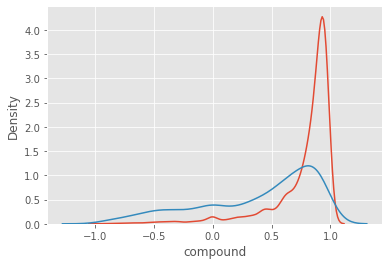

In [322]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df_ten[df_ten['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [323]:
reviews_df1 = df_ten.drop(['subjectivity','polarity','is_neutral_review', 'is_positive_review','Age', 'Title', 'Division Name', 'lemmatized_word','Department Name', 'Class Name', 'Review Text', 'Clothing ID', 'lemmatized_string', 'Rating', 'Recommended IND', ], axis=1)

In [324]:
reviews_df1.head()

Positive Feedback Count  review_length    neg    neu    pos  compound  \
0                        0            500  0.048  0.705  0.247    0.8402   
1                        0            124  0.182  0.131  0.686    0.9464   
2                        6            192  0.000  0.469  0.531    0.8807   
3                        4            488  0.000  0.652  0.348    0.9153   
4                        1            496  0.060  0.849  0.092    0.3400   

   nb_chars  nb_words  is_bad_review  
0       247        38              0  
1        80        12              0  
2        90        12              0  
3       193        28              1  
4       248        40              0

In [325]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df1.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df1[features], reviews_df1[label], test_size = 0.20, random_state = 42)

In [326]:
X_train[1:]

Positive Feedback Count  review_length    neg    neu    pos  compound  \
3123                        37            500  0.054  0.833  0.113    0.3400   
3822                         3            497  0.071  0.613  0.316    0.8402   
5237                         1            125  0.093  0.308  0.599    0.9100   
14939                        0            190  0.240  0.452  0.308    0.3612   
2605                         6            311  0.000  0.745  0.255    0.8625   
...                        ...            ...    ...    ...    ...       ...   
12083                        1            299  0.058  0.419  0.524    0.9571   
12830                        0            258  0.000  0.545  0.455    0.9100   
5793                         5            287  0.000  0.616  0.384    0.9042   
923                          1            258  0.090  0.435  0.475    0.9100   
17055                        0            500  0.000  0.512  0.488    0.9769   

       nb_chars  nb_words  
3123        247        38  
3822        163        25  
5237         70        12  
14939        92        14  
2605        198        31  
...         ...       ...  
12083       162        23  
12830       133        20  
5793        136        21  
923         137        20  
17055       247        37  

[14542 rows x 8 columns]

In [327]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
5                 compound    0.175405
4                      pos    0.141767
6                 nb_chars    0.134963
1            review_length    0.134318
3                      neu    0.130590
2                      neg    0.123174
7                 nb_words    0.089774
0  Positive Feedback Count    0.070007

In [328]:
#Find Accuracy
from sklearn.metrics import confusion_matrix,classification_report
predictions = rf.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94      3553
           1       0.11      0.51      0.18        83

    accuracy                           0.90      3636
   macro avg       0.55      0.71      0.56      3636
weighted avg       0.97      0.90      0.93      3636



In [331]:
reviews_df2 = df_ten.drop(['subjectivity','polarity','is_bad_review', 'is_positive_review','Age', 'Title', 'Division Name', 'lemmatized_word','Department Name', 'Class Name', 'Review Text', 'Clothing ID', 'lemmatized_string', 'Rating', 'Recommended IND', ], axis=1)
reviews_df2.head()

Positive Feedback Count  review_length    neg    neu    pos  compound  \
0                        0            500  0.048  0.705  0.247    0.8402   
1                        0            124  0.182  0.131  0.686    0.9464   
2                        6            192  0.000  0.469  0.531    0.8807   
3                        4            488  0.000  0.652  0.348    0.9153   
4                        1            496  0.060  0.849  0.092    0.3400   

   nb_chars  nb_words  is_neutral_review  
0       247        38                  1  
1        80        12                  0  
2        90        12                  0  
3       193        28                  0  
4       248        40                  0

In [332]:
# feature selection
label = "is_neutral_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df2.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df2[features], reviews_df2[label], test_size = 0.20, random_state = 42)

In [187]:
#train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

/Users/shefali/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:569: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/shefali/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:190: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

feature  importance
2                  polarity    0.130070
7                  compound    0.116164
3              subjectivity    0.112689
8                  nb_chars    0.099911
6                       pos    0.098723
1             review_length    0.097332
5                       neu    0.097255
4                       neg    0.078982
9                  nb_words    0.068920
0   Positive Feedback Count    0.055157
10            is_bad_review    0.044797

In [333]:
#train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
5                 compound    0.151096
6                 nb_chars    0.148250
1            review_length    0.144763
4                      pos    0.143432
3                      neu    0.141312
2                      neg    0.102284
7                 nb_words    0.094156
0  Positive Feedback Count    0.074708

In [334]:
predictions = rf.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3607
           1       0.01      0.21      0.02        29

    accuracy                           0.87      3636
   macro avg       0.50      0.54      0.48      3636
weighted avg       0.98      0.87      0.92      3636



In [335]:
reviews_df3 = df_ten.drop(['subjectivity','polarity','is_bad_review', 'is_neutral_review','Age', 'Title', 'Division Name', 'lemmatized_word','Department Name', 'Class Name', 'Review Text', 'Clothing ID', 'lemmatized_string', 'Rating', 'Recommended IND', ], axis=1)
reviews_df3.head()

Positive Feedback Count  review_length    neg    neu    pos  compound  \
0                        0            500  0.048  0.705  0.247    0.8402   
1                        0            124  0.182  0.131  0.686    0.9464   
2                        6            192  0.000  0.469  0.531    0.8807   
3                        4            488  0.000  0.652  0.348    0.9153   
4                        1            496  0.060  0.849  0.092    0.3400   

   nb_chars  nb_words  is_positive_review  
0       247        38                   0  
1        80        12                   1  
2        90        12                   1  
3       193        28                   0  
4       248        40                   1

In [336]:
# feature selection
label = "is_positive_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df3.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df3[features], reviews_df3[label], test_size = 0.20, random_state = 42)

In [337]:
#train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
5                 compound    0.188032
4                      pos    0.153512
6                 nb_chars    0.128645
1            review_length    0.128199
3                      neu    0.126692
2                      neg    0.122285
7                 nb_words    0.086854
0  Positive Feedback Count    0.065781

In [338]:
predictions = rf.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.31      0.55      0.40       470
           1       0.92      0.82      0.87      3166

    accuracy                           0.78      3636
   macro avg       0.62      0.69      0.63      3636
weighted avg       0.85      0.78      0.81      3636



## LDA Model

In [339]:
df_ten.head()

Clothing ID  Age                    Title  \
0        1077   60  Some major design flaws   
1        1049   50         My favorite buy!   
2         847   47         Flattering shirt   
3        1080   49  Not for the very petite   
4         858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  I had such high hopes for this dress and reall...       3                0   
1  I love, love, love this jumpsuit. it's fun, fl...       5                1   
2  This shirt is very flattering to all due to th...       5                1   
3  I love tracy reese dresses, but this one is no...       2                0   
4  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  ...  \
0                        0         General         Dresses    Dresses  ...   
1                        0  General Petite         Bottoms      Pants  ...   
2                        6         General            Tops    Blouses  ...   
3                        4         General         Dresses    Dresses  ...   
4                        1  General Petite            Tops      Knits  ...   

                                   lemmatized_string    neg    neu    pos  \
0  high hopes initially petite small usual found ...  0.048  0.705  0.247   
1  love love love jumpsuit fun flirty fabulous ev...  0.182  0.131  0.686   
2  flattering due adjustable front tie perfect le...  0.000  0.469  0.531   
3  love tracy reese dresses petite feet tall 0p b...  0.000  0.652  0.348   
4  aded basket hte last mintue see person store p...  0.060  0.849  0.092   

  compound  nb_chars  nb_words  is_bad_review  is_neutral_review  \
0   0.8402       247        38              0                  1   
1   0.9464        80        12              0                  0   
2   0.8807        90        12              0                  0   
3   0.9153       193        28              1                  0   
4   0.3400       248        40              0                  0   

   is_positive_review  
0                   0  
1                   1  
2                   1  
3                   0  
4                   1  

[5 rows x 24 columns]

In [340]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [341]:
data = df_ten['lemmatized_word']
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['high', 'hopes', 'initially', 'petite', 'small', 'usual', 'found', 'outrageously', 'small', 'small', 'fact', 'zip', 'reordered', 'petite', 'medium', 'ok', 'overall', 'half', 'comfortable', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'directly', 'zipper']]


In [342]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [343]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [344]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])

print(data_lemmatized[:1])

[['high_hope', 'petite', 'find', 'fact', 'zip', 'reorder', 'medium', 'layer', 'layer', 'imo', 'design', 'flaw', 'layer', 'zipper']]


In [345]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [346]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [347]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.065*"sale" + 0.057*"price" + 0.043*"medium" + 0.033*"review" + '
  '0.026*"tank" + 0.021*"reviewer" + 0.018*"pull" + 0.018*"bra" + '
  '0.015*"today" + 0.014*"wait"'),
 (1,
  '0.054*"waist" + 0.036*"cut" + 0.033*"shoulder" + 0.027*"flatter" + '
  '0.025*"pattern" + 0.022*"weight" + 0.022*"show" + 0.021*"line" + '
  '0.020*"bust" + 0.020*"photo"'),
 (2,
  '0.048*"side" + 0.036*"look" + 0.027*"know" + 0.024*"take" + 0.023*"like" + '
  '0.021*"seem" + 0.020*"flow" + 0.020*"belt" + 0.020*"decide" + '
  '0.017*"neckline"'),
 (3,
  '0.030*"thing" + 0.026*"wash" + 0.025*"hope" + 0.024*"tee" + 0.021*"leg" + '
  '0.021*"embroidery" + 0.021*"recommend" + 0.019*"reference" + 0.019*"sleeve" '
  '+ 0.019*"xs"'),
 (4,
  '0.067*"love" + 0.034*"fabric" + 0.025*"fit" + 0.022*"wear" + 0.020*"length" '
  '+ 0.020*"see" + 0.020*"feel" + 0.020*"run" + 0.019*"material" + '
  '0.018*"color"')]


In [348]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.826260823286423

Coherence Score:  0.2791511339587142


In [349]:
# Visualize the topics
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.423457  0.024111       1        1  54.297351
1      0.080985 -0.389838       2        1  17.249262
3      0.115341  0.129645       3        1   9.870533
2      0.114549  0.126588       4        1   9.690642
0      0.112581  0.109495       5        1   8.892212, topic_info=          Term         Freq        Total Category  logprob  loglift
16        love  8445.000000  8445.000000  Default  30.0000  30.0000
124      waist  2166.000000  2166.000000  Default  29.0000  29.0000
250       sale  1350.000000  1350.000000  Default  28.0000  28.0000
173      price  1176.000000  1176.000000  Default  27.0000  27.0000
80      fabric  4273.000000  4273.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
654      month   142.569130   143.361028   Topic5  -4.9739   2.4145
665       snag   137.558763   138.347057   Topic5  -5.0097   2.4143
457       home   129.120036   129.907500   Topic5  -5.0730   2.4139
254   necklace   126.865349   127.655913   Topic5  -5.0906   2.4138
1996    kimono   129.251800   130.067467   Topic5  -5.0720   2.4137

[182 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
135       2  0.999102    ankle
84        2  0.998088     area
310       5  0.994133  armhole
496       4  0.999042     belt
704       5  0.993629   bodice
...     ...       ...      ...
739       5  0.995955  wrinkle
432       3  0.997164       xs
93        3  0.997432     year
10        5  0.995337      zip
11        4  0.997606   zipper

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])